### 1) Problem statement
- The goal is to predict product sales (Item_Outlet_Sales) for various retail products using features such as product details (e.g., Item_Type, Item_MRP) and store attributes (e.g., Outlet_Type, Outlet_Size). 
- Accurate predictions will help retailers manage inventory and optimize sales strategies.
- The challenge involves handling missing data, encoding categorical variables, and identifying relationships between features to build an effective machine learning model.

Dataset Columns:
- 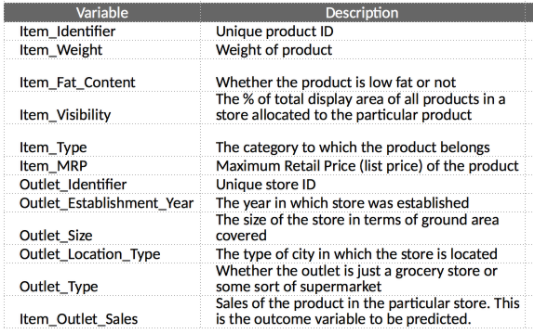

In [2]:
import pandas as pd
df = pd.read_csv("./data/retail_sales_data.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape #12 columns and 8523 records

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# Example: Fill missing Item_Weight with mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


/tmp/ipykernel_20849/488952351.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


In [10]:
numerical_data = df.select_dtypes(exclude=['object'])
numerical_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [11]:
categorical_data = df.select_dtypes(include=['object'])
categorical_data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [12]:
for cat_col in categorical_data.columns:
    print(f"Categories in {cat_col} variable:     ",end=" " )
    print(categorical_data[cat_col].unique())

Categories in Item_Identifier variable:      ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Categories in Item_Fat_Content variable:      ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Categories in Item_Type variable:      ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Categories in Outlet_Identifier variable:      ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Categories in Outlet_Size variable:      ['Medium' nan 'High' 'Small']
Categories in Outlet_Location_Type variable:      ['Tier 1' 'Tier 3' 'Tier 2']
Categories in Outlet_Type variable:      ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [13]:
# Standardizing 'Item_Fat_Content' by replacing redundant values
categorical_data['Item_Fat_Content'] = categorical_data['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})
categorical_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [14]:
# Filling missing values in 'Outlet_Size' with the most frequent value (mode)
categorical_data['Outlet_Size'].fillna(categorical_data['Outlet_Size'].mode()[0], inplace=True)
categorical_data['Outlet_Size'].unique()

/tmp/ipykernel_20849/3788732881.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categorical_data['Outlet_Size'].fillna(categorical_data['Outlet_Size'].mode()[0], inplace=True)


array(['Medium', 'High', 'Small'], dtype=object)

In [15]:
for cat_col in categorical_data.columns:
    print(f"Categories in {cat_col} variable:     ",end=" " )
    print(categorical_data[cat_col].unique())

Categories in Item_Identifier variable:      ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Categories in Item_Fat_Content variable:      ['Low Fat' 'Regular']
Categories in Item_Type variable:      ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Categories in Outlet_Identifier variable:      ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Categories in Outlet_Size variable:      ['Medium' 'High' 'Small']
Categories in Outlet_Location_Type variable:      ['Tier 1' 'Tier 3' 'Tier 2']
Categories in Outlet_Type variable:      ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [16]:
#categorical_data.drop('Item_Identifier', axis=1, inplace=True)
categorical_data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [17]:
numerical_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [18]:
df_combined = pd.concat([numerical_data, categorical_data], axis=1)

In [19]:
df_combined.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0.016047,249.8092,1999,3735.1380,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,5.92,0.019278,48.2692,2009,443.4228,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,17.50,0.016760,141.6180,1999,2097.2700,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,19.20,0.000000,182.0950,1998,732.3800,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,8.93,0.000000,53.8614,1987,994.7052,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


# DATA VISUALIZATION

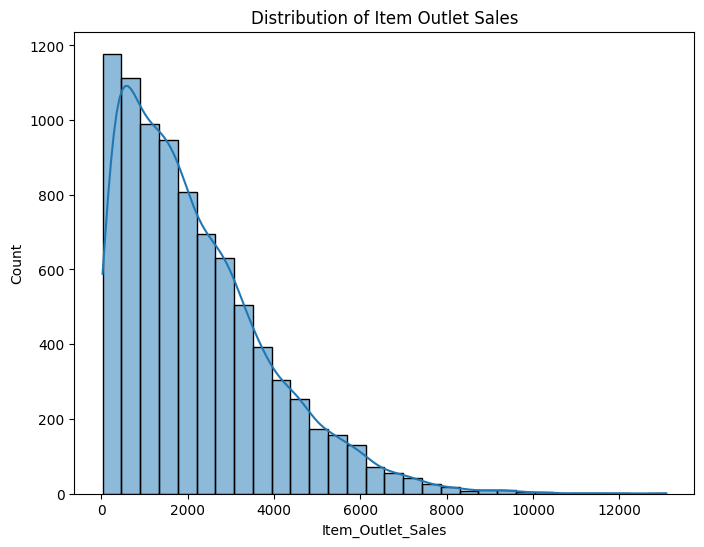

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.histplot(df_combined['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.show()

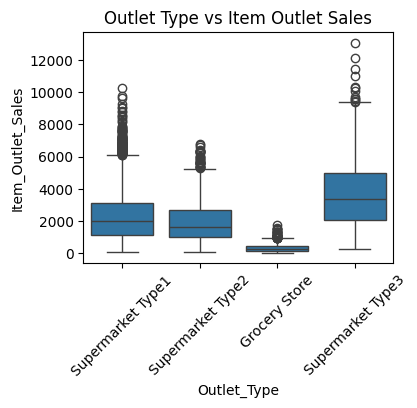

In [21]:
#sales across different outlet types
plt.figure(figsize=(4,3))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df_combined)
plt.title('Outlet Type vs Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()


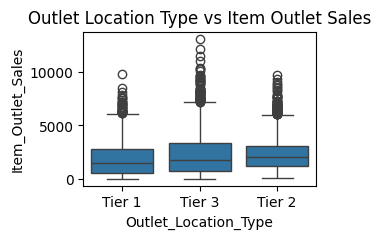

In [22]:
#sales across different outlet locations
plt.figure(figsize=(3,2))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df_combined)
plt.title('Outlet Location Type vs Item Outlet Sales')
plt.show()


<Figure size 100x100 with 0 Axes>

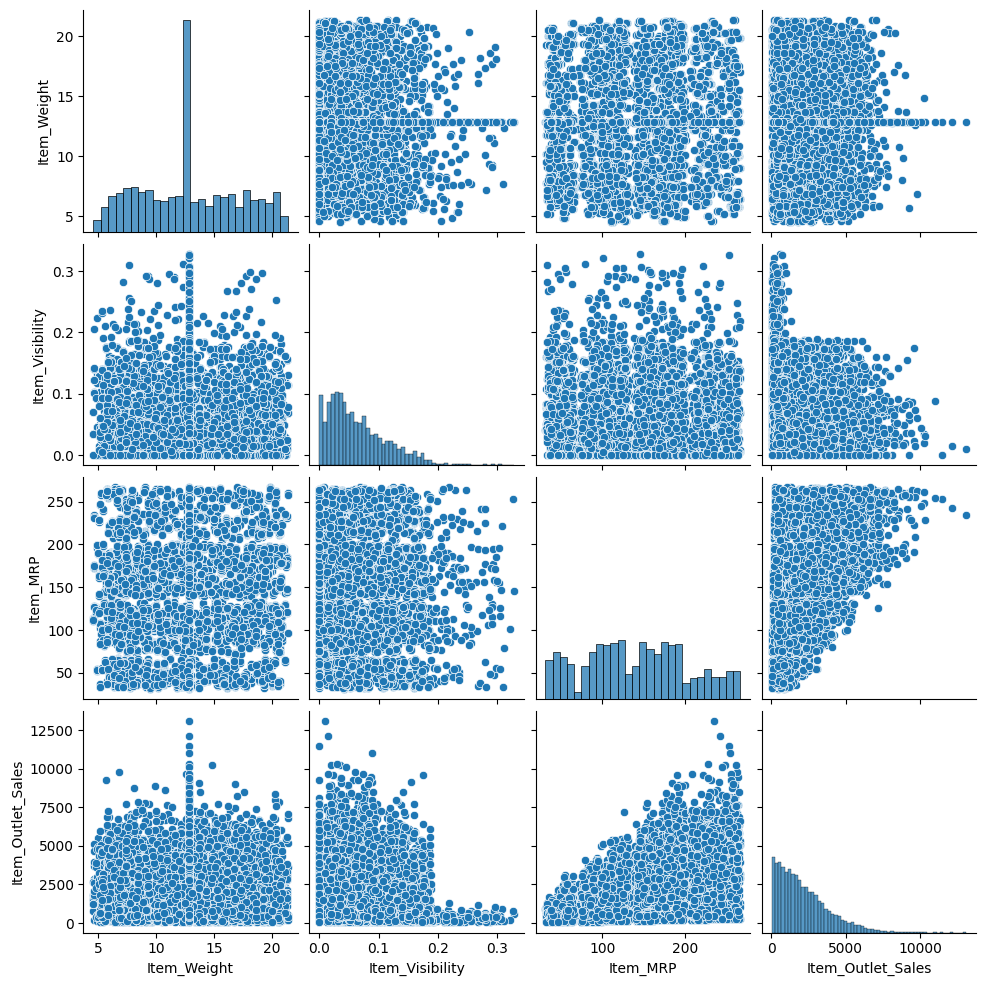

In [23]:
#Using Seaborn’s pairplot to visualize pairwise relationships between numerical variables:
plt.figure(figsize=(1,1))
sns.pairplot(df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']])
plt.show()


In [24]:
df_combined.to_csv("./data/processed_retail_sales_dataset.csv",index=False)